In [4]:
import pandas as pd
from statsmodels.tools import categorical

# Load the uploaded dataset
file_path = "C:\\Users\\lee39\\OneDrive\\Desktop\\final_merged_dataset.csv"

df = pd.read_csv(file_path)

cleaned_df = df.copy()

# Display the first few rows and basic info
cleaned_df.describe()

,patientunitstayid,age,hospitalid,unitdischargeoffset,has_COPD,has_Diabetes,has_Metastasis,has_Sepsis_A41_9,GCS,vent,has_Vasopressor,WBC x 1000,Hgb,platelets x 1000,total bilirubin,creatinine,albumin,anion gap
count,3.548900e+04,35489.000000,35489.000000,35489.000000,35489.000000,35489.000000,35489.000000,35489.000000,35489.00000,35489.000000,35489.000000,35489.000000,35489.000000,35489.000000,35489.000000,35489.000000,35489.000000,35489.000000
mean,1.694802e+06,63.050833,265.083547,5147.132717,0.019161,0.011384,0.001606,0.023754,12.22931,0.314830,0.054101,11.506078,10.999848,213.402350,17.565375,130.905190,3.054420,10.469145
std,9.188816e+05,16.883981,104.248469,6696.283487,0.137092,0.106087,0.040045,0.152283,4.06568,0.464455,0.226221,8.329026,2.439090,108.588589,38.109874,142.525403,0.756589,4.829969
min,2.420820e+05,1.000000,79.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-3.00000,0.000000,0.000000,0.000000,2.700000,1.000000,0.000000,8.840000,0.100000,-5.000000
25%,9.210870e+05,53.000000,176.000000,1583.000000,0.000000,0.000000,0.000000,0.000000,10.00000,0.000000,0.000000,7.300000,9.100000,143.000000,6.840000,61.880000,2.500000,7.000000
50%,1.583018e+06,65.000000,252.000000,2937.000000,0.000000,0.000000,0.000000,0.000000,14.00000,0.000000,0.000000,10.000000,10.800000,199.000000,10.260000,84.864000,3.100000,10.000000
75%,2.421502e+06,76.000000,338.000000,5750.000000,0.000000,0.000000,0.000000,0.000000,15.00000,1.000000,0.000000,13.700000,12.700000,265.000000,15.390000,132.600000,3.600000,13.000000
max,3.353254e+06,90.000000,459.000000,128140.000000,1.000000,1.000000,1.000000,1.000000,15.00000,1.000000,1.000000,446.000000,22.300000,2036.000000,1072.170000,2422.160000,7.400000,51.000000


In [5]:
cleaned_df.head()

,patientunitstayid,gender,age,ethnicity,hospitalid,admission_type,unitdischargestatus,unitdischargeoffset,has_COPD,has_Diabetes,...,GCS,vent,has_Vasopressor,WBC x 1000,Hgb,platelets x 1000,total bilirubin,creatinine,albumin,anion gap
0,242082,Male,75,Caucasian,108,Emergency,Alive,2752,0.0,0.0,...,15.0,0.0,0.0,7.18,13.1,169.0,20.52,69.836,4.1,11.0
1,242083,Female,90,Caucasian,92,Emergency,Alive,1546,0.0,0.0,...,15.0,0.0,0.0,10.00,14.7,213.0,15.39,71.604,4.2,18.0
2,242154,Female,46,Caucasian,79,Elective,Alive,8792,0.0,0.0,...,7.0,1.0,0.0,21.30,10.5,450.0,3.42,35.360,2.8,8.0
3,242290,Female,75,Other/Unknown,79,Elective,Alive,1656,0.0,0.0,...,15.0,0.0,0.0,12.40,11.1,239.0,6.84,141.440,2.6,9.0
4,242319,Male,61,Caucasian,79,Elective,Alive,1856,0.0,0.0,...,15.0,0.0,0.0,9.10,9.1,149.0,6.84,150.280,2.6,9.0


In [6]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35489 entries, 0 to 35488
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   patientunitstayid    35489 non-null  int64  
 1   gender               35489 non-null  object 
 2   age                  35489 non-null  int64  
 3   ethnicity            35489 non-null  object 
 4   hospitalid           35489 non-null  int64  
 5   admission_type       35489 non-null  object 
 6   unitdischargestatus  35489 non-null  object 
 7   unitdischargeoffset  35489 non-null  int64  
 8   has_COPD             35489 non-null  float64
 9   has_Diabetes         35489 non-null  float64
 10  has_Metastasis       35489 non-null  float64
 11  has_Sepsis_A41_9     35489 non-null  float64
 12  GCS                  35489 non-null  float64
 13  vent                 35489 non-null  float64
 14  has_Vasopressor      35489 non-null  float64
 15  WBC x 1000           35489 non-null 

In [7]:
cleaned_df.head()

,patientunitstayid,gender,age,ethnicity,hospitalid,admission_type,unitdischargestatus,unitdischargeoffset,has_COPD,has_Diabetes,...,GCS,vent,has_Vasopressor,WBC x 1000,Hgb,platelets x 1000,total bilirubin,creatinine,albumin,anion gap
0,242082,Male,75,Caucasian,108,Emergency,Alive,2752,0.0,0.0,...,15.0,0.0,0.0,7.18,13.1,169.0,20.52,69.836,4.1,11.0
1,242083,Female,90,Caucasian,92,Emergency,Alive,1546,0.0,0.0,...,15.0,0.0,0.0,10.00,14.7,213.0,15.39,71.604,4.2,18.0
2,242154,Female,46,Caucasian,79,Elective,Alive,8792,0.0,0.0,...,7.0,1.0,0.0,21.30,10.5,450.0,3.42,35.360,2.8,8.0
3,242290,Female,75,Other/Unknown,79,Elective,Alive,1656,0.0,0.0,...,15.0,0.0,0.0,12.40,11.1,239.0,6.84,141.440,2.6,9.0
4,242319,Male,61,Caucasian,79,Elective,Alive,1856,0.0,0.0,...,15.0,0.0,0.0,9.10,9.1,149.0,6.84,150.280,2.6,9.0


In [8]:
cleaned_df["has_Vasopressor"].value_counts()


0.0    33569
1.0     1920
Name: has_Vasopressor, dtype: int64

In [9]:
cleaned_df.drop(["patientunitstayid"], inplace=True, axis=1)
cleaned_df.drop(["hospitalid"], inplace=True, axis=1)

In [10]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35489 entries, 0 to 35488
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               35489 non-null  object 
 1   age                  35489 non-null  int64  
 2   ethnicity            35489 non-null  object 
 3   admission_type       35489 non-null  object 
 4   unitdischargestatus  35489 non-null  object 
 5   unitdischargeoffset  35489 non-null  int64  
 6   has_COPD             35489 non-null  float64
 7   has_Diabetes         35489 non-null  float64
 8   has_Metastasis       35489 non-null  float64
 9   has_Sepsis_A41_9     35489 non-null  float64
 10  GCS                  35489 non-null  float64
 11  vent                 35489 non-null  float64
 12  has_Vasopressor      35489 non-null  float64
 13  WBC x 1000           35489 non-null  float64
 14  Hgb                  35489 non-null  float64
 15  platelets x 1000     35489 non-null 

In [11]:
categorical_name = ["gender",
                    "ethnicity",
                    "admission_type",
                    "has_Vasopressor",
                    "has_COPD",
                    "has_Diabetes",
                    "has_Metastasis",
                    "has_Sepsis_A41_9"]

for name in categorical_name:
    cleaned_df[name] = cleaned_df[name].astype("category")


In [12]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35489 entries, 0 to 35488
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   gender               35489 non-null  category
 1   age                  35489 non-null  int64   
 2   ethnicity            35489 non-null  category
 3   admission_type       35489 non-null  category
 4   unitdischargestatus  35489 non-null  object  
 5   unitdischargeoffset  35489 non-null  int64   
 6   has_COPD             35489 non-null  category
 7   has_Diabetes         35489 non-null  category
 8   has_Metastasis       35489 non-null  category
 9   has_Sepsis_A41_9     35489 non-null  category
 10  GCS                  35489 non-null  float64 
 11  vent                 35489 non-null  float64 
 12  has_Vasopressor      35489 non-null  category
 13  WBC x 1000           35489 non-null  float64 
 14  Hgb                  35489 non-null  float64 
 15  platelets x 1000   

In [13]:
time = cleaned_df["unitdischargeoffset"]
cleaned_df.drop(["unitdischargeoffset"], inplace=True, axis=1)

event = (cleaned_df['unitdischargestatus'] == 'Expired').astype(int)
cleaned_df.drop(["unitdischargestatus"], inplace=True, axis=1)

In [15]:
time, event

(0         2752
 1         1546
 2         8792
 3         1656
 4         1856
          ...  
 35484     3090
 35485    11513
 35486     1269
 35487    16259
 35488      431
 Name: unitdischargeoffset, Length: 35489, dtype: int64,
 0        0
 1        0
 2        0
 3        0
 4        0
         ..
 35484    0
 35485    1
 35486    0
 35487    0
 35488    0
 Name: unitdischargestatus, Length: 35489, dtype: int32)

In [16]:
event.value_counts()

0    32900
1     2589
Name: unitdischargestatus, dtype: int64

In [18]:
numerical_name = cleaned_df.columns.drop(categorical_name)
numerical_name

Index(['age', 'GCS', 'vent', 'WBC x 1000', 'Hgb', 'platelets x 1000',
       'total bilirubin', 'creatinine', 'albumin', 'anion gap'],
      dtype='object')

In [19]:
categorical_name

['gender',
 'ethnicity',
 'admission_type',
 'has_Vasopressor',
 'has_COPD',
 'has_Diabetes',
 'has_Metastasis',
 'has_Sepsis_A41_9']

# Data

In [20]:
import pandas as pd
import statsmodels.api as sm

x = cleaned_df.copy()
y = event


In [21]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_name),        # normalize numeric
        ('cat', OneHotEncoder(drop='first'), categorical_name)  # encode categorical
    ]
)

X_processed = preprocessor.fit_transform(x)

In [22]:
# Get feature names
num_features = numerical_name
cat_features = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_name)

import numpy as np
df_transformed = pd.DataFrame(
    X_processed,
    columns=np.concatenate([num_features, cat_features])
)

df_transformed

,age,GCS,vent,WBC x 1000,Hgb,platelets x 1000,total bilirubin,creatinine,albumin,anion gap,...,ethnicity_Caucasian,ethnicity_Hispanic,ethnicity_Native American,ethnicity_Other/Unknown,admission_type_Emergency,has_Vasopressor_1.0,has_COPD_1.0,has_Diabetes_1.0,has_Metastasis_1.0,has_Sepsis_A41_9_1.0
0,0.707732,0.681492,-0.677858,-0.519405,0.861052,-0.408910,0.077530,-0.428485,1.381986,0.109910,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,1.596161,0.681492,-0.677858,-0.180825,1.517043,-0.003705,-0.057082,-0.416080,1.514160,1.559215,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,-1.009896,-1.286226,1.475235,1.175895,-0.204935,2.178875,-0.371179,-0.670383,-0.336277,-0.511221,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.707732,0.681492,-0.677858,0.107328,0.041062,0.235734,-0.281437,0.073916,-0.600625,-0.304177,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.121468,0.681492,-0.677858,-0.288883,-0.778928,-0.593094,-0.281437,0.135941,-0.600625,-0.304177,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35484,-0.772982,-1.286226,1.475235,-0.480985,-1.106924,0.548847,-0.371179,-0.465700,-0.336277,-1.339395,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
35485,0.944646,-3.745874,1.475235,0.119334,-0.409932,-0.372073,-0.281437,2.108333,-0.071929,-0.925308,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
35486,0.944646,0.435527,-0.677858,-0.348915,0.697054,-0.620722,-0.146824,-0.254816,0.588942,0.316954,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
35487,0.589275,-2.270085,1.475235,1.199908,-0.368933,0.152851,-0.281437,1.550109,-0.071929,-0.097134,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [23]:
# train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_transformed, y, stratify=y, test_size=0.3, random_state=42)

# logistic regression

In [24]:
con_train_x = sm.add_constant(X_train)

In [25]:
model = sm.Logit(y_train, con_train_x)
results = model.fit(method="bfgs", maxiter=200)
results.summary()

Optimization terminated successfully.
         Current function value: 0.199478
         Iterations: 157
         Function evaluations: 158
         Gradient evaluations: 158


<class 'statsmodels.iolib.summary.Summary'>
"""
                            Logit Regression Results                           
===============================================================================
Dep. Variable:     unitdischargestatus   No. Observations:                24842
Model:                           Logit   Df Residuals:                    24818
Method:                            MLE   Df Model:                           23
Date:                 Wed, 02 Jul 2025   Pseudo R-squ.:                  0.2362
Time:                         20:09:03   Log-Likelihood:                -4955.4
converged:                        True   LL-Null:                       -6488.3
Covariance Type:             nonrobust   LLR p-value:                     0.000
=============================================================================================
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                        -3.3312      0.111    -30.136      0.000      -3.548      -3.115
age                           0.3518      0.032     11.165      0.000       0.290       0.414
GCS                          -0.5223      0.025    -20.886      0.000      -0.571      -0.473
vent                          0.3196      0.029     11.020      0.000       0.263       0.376
WBC x 1000                    0.2808      0.025     11.085      0.000       0.231       0.330
Hgb                           0.0260      0.031      0.850      0.395      -0.034       0.086
platelets x 1000             -0.2568      0.030     -8.671      0.000      -0.315      -0.199
total bilirubin               0.1396      0.018      7.779      0.000       0.104       0.175
creatinine                    0.0658      0.025      2.595      0.009       0.016       0.115
albumin                      -0.5292      0.031    -17.047      0.000      -0.590      -0.468
anion gap                     0.5132      0.025     20.602      0.000       0.464       0.562
gender_Male                  -0.0960      0.056     -1.723      0.085      -0.205       0.013
gender_Unknown               -0.0171      6.212     -0.003      0.998     -12.192      12.157
ethnicity_Asian               0.0077      0.255      0.030      0.976      -0.493       0.508
ethnicity_Caucasian           0.1445      0.102      1.416      0.157      -0.056       0.345
ethnicity_Hispanic           -0.2062      0.238     -0.868      0.385      -0.672       0.259
ethnicity_Native American    -0.2530      0.275     -0.921      0.357      -0.792       0.286
ethnicity_Other/Unknown      -0.0733      0.163     -0.450      0.653      -0.392       0.246
admission_type_Emergency     -0.0877      0.056     -1.578      0.115      -0.197       0.021
has_Vasopressor_1.0           0.9385      0.085     11.003      0.000       0.771       1.106
has_COPD_1.0                  0.0412      0.214      0.193      0.847      -0.378       0.460
has_Diabetes_1.0              0.2900      0.285      1.019      0.308      -0.268       0.848
has_Metastasis_1.0            0.4235      0.657      0.645      0.519      -0.863       1.711
has_Sepsis_A41_9_1.0          0.2891      0.146      1.974      0.048       0.002       0.576
=============================================================================================
"""

In [26]:
X_train.shape, X_test.shape

((24842, 23), (10647, 23))

In [27]:
from sklearn.metrics import classification_report, roc_auc_score
# evaluate mode
con_test_x = sm.add_constant(X_test)
y_prob = results.predict(con_test_x)
y_prob

25362    0.014478
15082    0.028297
35018    0.014210
33662    0.011899
10392    0.041562
           ...   
21558    0.023054
14850    0.019369
3866     0.007331
19952    0.062898
18000    0.010613
Length: 10647, dtype: float64

In [28]:
odds_ratios = pd.Series(np.exp(results.params), index=results.params.index)
print("Odds Ratios:")
print(odds_ratios)

Odds Ratios:
const                        0.035752
age                          1.421607
GCS                          0.593165
vent                         1.376635
WBC x 1000                   1.324137
Hgb                          1.026388
platelets x 1000             0.773510
total bilirubin              1.149766
creatinine                   1.067997
albumin                      0.589064
anion gap                    1.670669
gender_Male                  0.908483
gender_Unknown               0.983013
ethnicity_Asian              1.007739
ethnicity_Caucasian          1.155466
ethnicity_Hispanic           0.813689
ethnicity_Native American    0.776442
ethnicity_Other/Unknown      0.929362
admission_type_Emergency     0.916049
has_Vasopressor_1.0          2.556075
has_COPD_1.0                 1.042083
has_Diabetes_1.0             1.336378
has_Metastasis_1.0           1.527329
has_Sepsis_A41_9_1.0         1.335190
dtype: float64


## Cox model


In [29]:
from lifelines import CoxPHFitter

df_cox = X_train.copy()
df_cox["time"] = time
df_cox["event"] = event

cph = CoxPHFitter()
cph.fit(df_cox, duration_col="time", event_col="event")
cph.print_summary()

C:\My_Programs\Anaconda\envs\CSMDRMP\lib\site-packages\lifelines\utils\__init__.py:1103: ConvergenceWarning: Column(s) ['gender_Unknown'] have very low variance. This may harm convergence. 1) Are you using formula's? Did you mean to add '-1' to the end. 2) Try dropping this redundant column before fitting if convergence fails.

  warnings.warn(dedent(warning_text), ConvergenceWarning)
C:\My_Programs\Anaconda\envs\CSMDRMP\lib\site-packages\lifelines\utils\__init__.py:997: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  nonnumeric_cols = [col for (col, dtype) in df.dtypes.iteritems() if dtype.name == "category" or dtype.kind not in "biuf"]
C:\My_Programs\Anaconda\envs\CSMDRMP\lib\site-packages\lifelines\utils\printer.py:62: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommend

<lifelines.CoxPHFitter: fitted with 24842 total observations, 23030 right-censored observations>
             duration col = 'time'
                event col = 'event'
      baseline estimation = breslow
   number of observations = 24842
number of events observed = 1812
   partial log-likelihood = -15061.74
         time fit was run = 2025-07-03 00:22:25 UTC

---
                            coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                         
age                         0.35       1.41       0.03             0.29             0.40                 1.34                 1.50
GCS                        -0.31       0.74       0.02            -0.35            -0.26                 0.71                 0.77
vent                        0.11       1.12       0.03             0.06             0.16                 1.06                 1.18
WBC x 1000                  0.15       1.16       0.01             0.13             0.17                 1.14                 1.18
Hgb                         0.18       1.19       0.03             0.12             0.23                 1.13                 1.26
platelets x 1000           -0.24       0.79       0.03            -0.29            -0.19                 0.75                 0.83
total bilirubin             0.02       1.02       0.01            -0.01             0.04                 0.99                 1.04
creatinine                  0.07       1.08       0.02             0.03             0.11                 1.03                 1.12
albumin                    -0.32       0.73       0.03            -0.37            -0.26                 0.69                 0.77
anion gap                   0.44       1.55       0.02             0.41             0.47                 1.50                 1.60
gender_Male                -0.15       0.86       0.05            -0.24            -0.05                 0.78                 0.95
gender_Unknown            -12.42       0.00    1919.17         -3773.92          3749.07                 0.00                  inf
ethnicity_Asian             0.24       1.27       0.23            -0.21             0.68                 0.81                 1.97
ethnicity_Caucasian         0.29       1.34       0.09             0.12             0.47                 1.13                 1.60
ethnicity_Hispanic         -0.07       0.93       0.21            -0.48             0.34                 0.62                 1.41
ethnicity_Native American   0.34       1.40       0.24            -0.12             0.80                 0.88                 2.23
ethnicity_Other/Unknown     0.08       1.09       0.14            -0.19             0.36                 0.82                 1.43
admission_type_Emergency    0.02       1.02       0.05            -0.07             0.12                 0.93                 1.12
has_Vasopressor_1.0         0.64       1.89       0.07             0.50             0.77                 1.66                 2.16
has_COPD_1.0               -0.05       0.95       0.20            -0.44             0.34                 0.64                 1.40
has_Diabetes_1.0            0.33       1.39       0.26            -0.18             0.84                 0.83                 2.31
has_Metastasis_1.0          0.75       2.12       0.58            -0.38             1.88                 0.68                 6.58
has_Sepsis_A41_9_1.0        0.33       1.39       0.12             0.09             0.57                 1.10                 1.77

                               z      p   -log2(p)
covariate                                         
age                        12.14 <0.005     110.25
GCS                       -14.29 <0.005     151.54
vent                        4.36 <0.005      16.25
WBC x 1000                 15.23 <0.005     171.69
Hgb                         6.70 <0.005      35.45
p

In [34]:
cph_df = pd.DataFrame()
cph_df["0.25"] = cph.predict_percentile(X_test, p=0.25)
cph_df["0.5"] = cph.predict_percentile(X_test, p=0.5)
cph_df["0.75"] = cph.predict_percentile(X_test, p=0.75)

cph_df

,0.25,0.5,0.75
25362,inf,inf,44489.0
15082,inf,inf,44489.0
35018,inf,inf,90900.0
33662,inf,inf,104599.0
10392,inf,57442.0,24531.0
...,...,...,...
21558,inf,90900.0,27021.0
14850,inf,inf,inf
3866,inf,inf,inf
19952,inf,48201.0,21366.0


In [43]:
cph.predict_survival_function(X_test)

,25362,15082,35018,33662,10392,16361,16394,10654,32253,1726,...,5836,14330,19671,31287,26735,21558,14850,3866,19952,18000
0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
3.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
5.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
6.0,0.999981,0.999981,0.999988,0.999990,0.999963,0.999916,0.999987,0.999988,0.999983,0.999987,...,0.999970,0.999981,0.999967,0.999918,0.999992,0.999968,0.999994,0.999992,0.999958,0.999989
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98201.0,0.615647,0.615414,0.735348,0.777882,0.398917,0.122169,0.724277,0.737518,0.654705,0.717745,...,0.474039,0.620533,0.440904,0.128418,0.808582,0.452206,0.870476,0.826705,0.351890,0.759947
104599.0,0.545836,0.545578,0.681347,0.730883,0.317582,0.072514,0.668567,0.683857,0.589392,0.661049,...,0.393894,0.551248,0.359833,0.077173,0.767060,0.371381,0.841026,0.788576,0.271559,0.709911
105880.0,0.545836,0.545578,0.681347,0.730883,0.317582,0.072514,0.668567,0.683857,0.589392,0.661049,...,0.393894,0.551248,0.359833,0.077173,0.767060,0.371381,0.841026,0.788576,0.271559,0.709911
110227.0,0.545836,0.545578,0.681347,0.730883,0.317582,0.072514,0.668567,0.683857,0.589392,0.661049,...,0.393894,0.551248,0.359833,0.077173,0.767060,0.371381,0.841026,0.788576,0.271559,0.709911


In [40]:
time[cph_df.index]

25362     1740
15082     8391
35018     3668
33662     3398
10392     4446
         ...  
21558     1528
14850    12676
3866     20720
19952     1741
18000     1100
Name: unitdischargeoffset, Length: 10647, dtype: int64

<Axes: xlabel='log(HR) (95% CI)'>

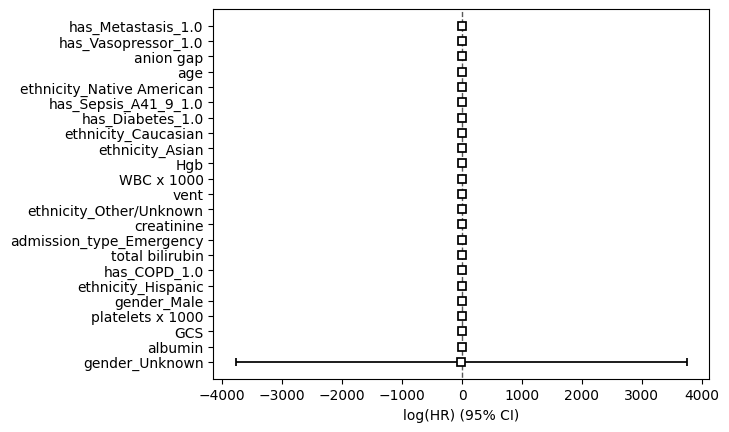

In [30]:
cph.plot()


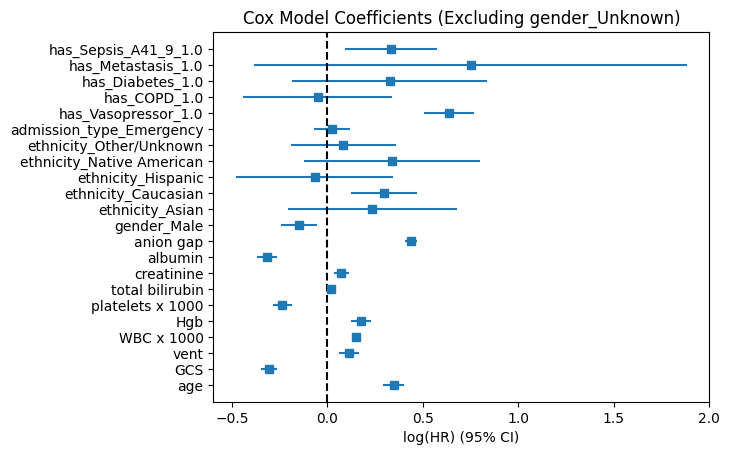

In [31]:
import matplotlib.pyplot as plt

# Get summary as DataFrame
summary_df = cph.summary

# Remove the row for gender_Unknown
plot_df = summary_df.drop(index="gender_Unknown")

# Plot manually
plt.errorbar(
    x=plot_df["coef"],
    y=plot_df.index,
    xerr=1.96 * plot_df["se(coef)"],
    fmt="s"
)
plt.axvline(x=0, color='black', linestyle='--')
plt.xlabel("log(HR) (95% CI)")
plt.title("Cox Model Coefficients (Excluding gender_Unknown)")
plt.show()


##

In [ ]:
from sklearn.linear_model import LogisticRegression

# Step 1: Extract treatment vector and features used to predict it
treatment = X_train["treatment"]
X_ps = X_train.drop(columns=["treatment"])  # Use all other variables to predict treatment

# Step 2: Fit logistic regression model
ps_model = LogisticRegression(max_iter=1000)
ps_model.fit(X_ps, treatment)

# Step 3: Predict propensity scores
propensity_scores = ps_model.predict_proba(X_ps)[:, 1]

In [54]:
from sklearn.neighbors import NearestNeighbors

# Step 1: Separate treated and control
treated = X_train[treatment == 1].copy()
control = X_train[treatment == 0].copy()
ps_treated = propensity_scores[treatment == 1]
ps_control = propensity_scores[treatment == 0]

In [58]:
ps_treated = ps_control.reshape(-1, 1)
ps_control = ps_control.reshape(-1, 1)

In [59]:

# Step 2: Match each treated to nearest control
nn = NearestNeighbors(n_neighbors=1)
nn.fit(ps_control)
distances, indices = nn.kneighbors(ps_treated)

# Step 3: Create matched dataset
matched_controls = control.iloc[indices.flatten()].copy()
matched_treated = treated.reset_index(drop=True)
matched_covariates = pd.concat([matched_treated, matched_controls], ignore_index=True)

In [61]:
matched_indices = pd.concat([
    treatment[treatment == 1].index.to_series().reset_index(drop=True),
    treatment[treatment == 0].iloc[indices.flatten()].index.to_series().reset_index(drop=True)
])

matched_time = time.loc[matched_indices].reset_index(drop=True)
matched_event = event.loc[matched_indices].reset_index(drop=True)

df_matched = matched_covariates.copy()
df_matched["time"] = matched_time
df_matched["event"] = matched_event

In [64]:
df_matched

,age,GCS,vent,WBC x 1000,Hgb,platelets x 1000,total bilirubin,creatinine,albumin,anion gap,...,ethnicity_Native American,ethnicity_Other/Unknown,admission_type_Emergency,has_Vasopressor_1.0,has_COPD_1.0,has_Diabetes_1.0,has_Metastasis_1.0,has_Sepsis_A41_9_1.0,time,event
0,-0.476839,0.435527,-0.677858,-0.661080,-0.081937,-1.053554,-0.012212,-0.360258,-0.468451,-0.925308,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,4459,0
1,1.240789,0.681492,-0.677858,0.710048,-0.696929,-0.657559,-0.281437,0.687963,-1.922366,2.180346,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,4372,1
2,1.359246,-0.794297,-0.677858,1.211914,0.123061,0.447546,-0.012212,-0.633168,-1.129321,-0.925308,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,6444,0
3,0.589275,0.681492,-0.677858,-0.841176,0.410057,-0.574676,-0.146824,0.706570,-1.525844,0.316954,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,4022,0
4,1.122332,0.189562,1.475235,-0.224048,-0.122936,-0.620722,-0.236566,0.073916,0.060245,1.579920,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,9006,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24837,-0.062239,-1.286226,1.475235,0.023283,-0.286934,-1.016717,-0.146824,-0.000514,-0.071929,-0.511221,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5430,0
24838,1.122332,0.435527,-0.677858,0.371468,0.451057,-0.445747,-0.281437,-0.180386,0.588942,-0.304177,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1522,0
24839,0.470818,0.681492,-0.677858,-0.348915,-1.188923,-0.473375,-0.326308,0.309611,0.060245,-1.339395,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2900,0
24840,-0.358382,0.681492,-0.677858,-0.250462,1.558043,0.290989,-0.191695,-0.527725,0.060245,0.523997,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1786,0


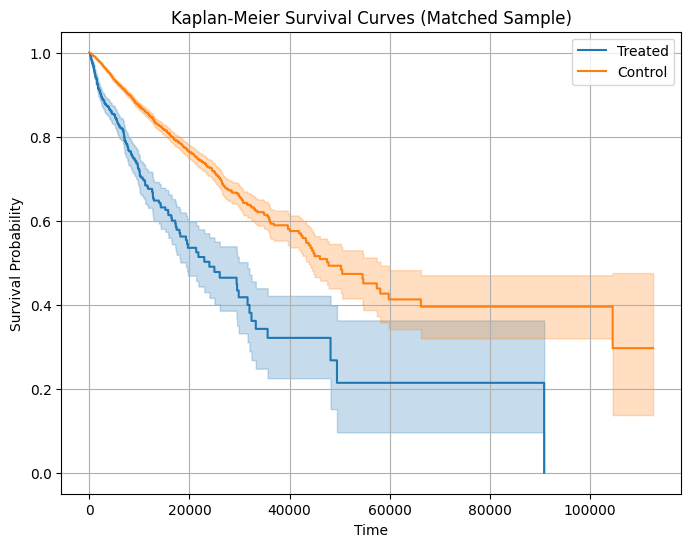

In [65]:
from lifelines import KaplanMeierFitter
import matplotlib.pyplot as plt

# Separate matched treated and control groups
matched_treatment = matched_covariates["has_Vasopressor_1.0"]  # 0/1 vector aligned with df_matched
kmf_treated = KaplanMeierFitter()
kmf_control = KaplanMeierFitter()

# Plot KM curves
plt.figure(figsize=(8,6))

kmf_treated.fit(df_matched["time"][matched_treatment == 1],
                df_matched["event"][matched_treatment == 1],
                label="Treated")
kmf_treated.plot(ci_show=True)

kmf_control.fit(df_matched["time"][matched_treatment == 0],
                df_matched["event"][matched_treatment == 0],
                label="Control")
kmf_control.plot(ci_show=True)

plt.title("Kaplan-Meier Survival Curves (Matched Sample)")
plt.xlabel("Time")
plt.ylabel("Survival Probability")
plt.grid(True)
plt.show()


In [66]:
from lifelines.statistics import logrank_test

results = logrank_test(
    df_matched["time"][matched_treatment == 1],
    df_matched["time"][matched_treatment == 0],
    event_observed_A=df_matched["event"][matched_treatment == 1],
    event_observed_B=df_matched["event"][matched_treatment == 0]
)

print(results.summary)


   test_statistic             p    -log2(p)
0      220.170206  8.303426e-50  163.042698


C:\My_Programs\Anaconda\envs\CSMDRMP\lib\site-packages\lifelines\utils\__init__.py:997: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  nonnumeric_cols = [col for (col, dtype) in df.dtypes.iteritems() if dtype.name == "category" or dtype.kind not in "biuf"]
C:\My_Programs\Anaconda\envs\CSMDRMP\lib\site-packages\lifelines\utils\printer.py:62: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  return summary_df[columns].to_latex(float_format="%." + str(self.decimals) + "f")


<lifelines.CoxPHFitter: fitted with 24842 total observations, 23030 right-censored observations>
             duration col = 'time'
                event col = 'event'
      baseline estimation = breslow
   number of observations = 24842
number of events observed = 1812
   partial log-likelihood = -15908.19
         time fit was run = 2025-07-03 01:51:17 UTC

---
                      coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                   
has_Vasopressor_1.0   0.95       2.57       0.07             0.82             1.08                 2.26                 2.93

                        z      p   -log2(p)
covariate                                  
has_Vasopressor_1.0 14.30 <0.005     151.68
---
Concordance = 0.56
Partial AIC = 31818.38
log-likelihood ratio test = 163.65 on 1 df
-log2(p) of ll-ratio test = 122.06

<Axes: xlabel='log(HR) (95% CI)'>

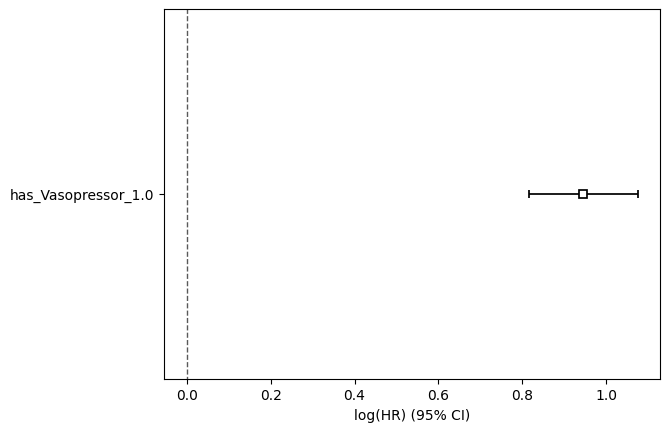

In [68]:
from lifelines import CoxPHFitter

# Fit Cox model (optionally only using treatment)
cph = CoxPHFitter()
cph.fit(df_matched[["time", "event", "has_Vasopressor_1.0"]], duration_col="time", event_col="event")
cph.print_summary()
cph.plot()
